<a href="https://colab.research.google.com/github/AnitaTasnim/image_processing/blob/main/working_CIFAR10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

cifar10 consists of 60000 32*32 RGB images,
labeled  with an integer corresponding to 1 to 10 class

 classes: airplane (0), automobile (1), bird (2), cat (3),
deer (4), dog (5), frog (6), horse (7), ship (8), and truck (9).

In [1]:
import torch
import matplotlib.pyplot as plt

In [2]:
!git clone https://github.com/deep-learning-with-pytorch/dlwpt-code

Cloning into 'dlwpt-code'...
remote: Enumerating objects: 703, done.
remote: Counting objects: 100% (149/149), done.
remote: Compressing objects: 100% (62/62), done.
remote: Total 703 (delta 106), reused 87 (delta 87), pack-reused 554
Receiving objects: 100% (703/703), 175.17 MiB | 15.31 MiB/s, done.
Resolving deltas: 100% (318/318), done.
Updating files: 100% (228/228), done.


#load dataset

In [3]:
from torchvision import datasets
data_path = '/content/dataset_cifar10'

In [4]:
cifar10 = datasets.CIFAR10(data_path, train=True, download=True)


100%|██████████| 170498071/170498071 [00:04<00:00, 42487337.86it/s]


Extracting /content/dataset_cifar10/cifar-10-python.tar.gz to /content/dataset_cifar10


In [5]:
cifar10_val = datasets.CIFAR10(data_path,train=False, download = True)

Files already downloaded and verified


In [6]:
type(cifar10)

torchvision.datasets.cifar.CIFAR10

In [7]:
len(cifar10)

50000

In [8]:
len(cifar10_val)

10000

In [9]:
cifar10

Dataset CIFAR10
    Number of datapoints: 50000
    Root location: /content/dataset_cifar10
    Split: Train

In [10]:
cifar10_val

Dataset CIFAR10
    Number of datapoints: 10000
    Root location: /content/dataset_cifar10
    Split: Test

In [11]:
cifar10[0]


(<PIL.Image.Image image mode=RGB size=32x32>, 6)

visualize dataset

In [12]:
img, label = cifar10[99]
img, label

(<PIL.Image.Image image mode=RGB size=32x32>, 1)

In [13]:
img, label = cifar10[99]
img, label

(<PIL.Image.Image image mode=RGB size=32x32>, 1)

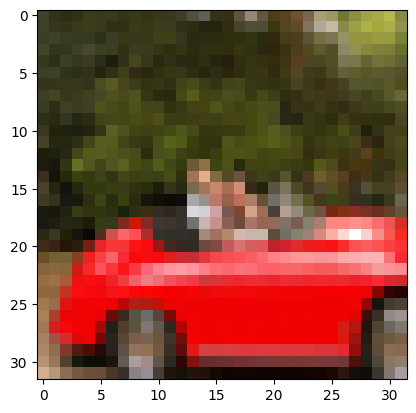

In [14]:
plt.imshow(img)

Okay, its a red car, but we need this PIL image to PyTorch tensor before we can do anything with it

so, we need torchvision.transforms

In [15]:
from torchvision import transforms
dir(transforms)

['AugMix',
 'AutoAugment',
 'AutoAugmentPolicy',
 'CenterCrop',
 'ColorJitter',
 'Compose',
 'ConvertImageDtype',
 'ElasticTransform',
 'FiveCrop',
 'GaussianBlur',
 'Grayscale',
 'InterpolationMode',
 'Lambda',
 'LinearTransformation',
 'Normalize',
 'PILToTensor',
 'Pad',
 'RandAugment',
 'RandomAdjustSharpness',
 'RandomAffine',
 'RandomApply',
 'RandomAutocontrast',
 'RandomChoice',
 'RandomCrop',
 'RandomEqualize',
 'RandomErasing',
 'RandomGrayscale',
 'RandomHorizontalFlip',
 'RandomInvert',
 'RandomOrder',
 'RandomPerspective',
 'RandomPosterize',
 'RandomResizedCrop',
 'RandomRotation',
 'RandomSolarize',
 'RandomVerticalFlip',
 'Resize',
 'TenCrop',
 'ToPILImage',
 'ToTensor',
 'TrivialAugmentWide',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_functional_pil',
 '_functional_tensor',
 '_presets',
 'autoaugment',
 'functional',
 'transforms']

Among those transforms, we can spot ToTensor, which turns NumPy arrays and PIL
images to tensors. It also takes care to lay out the dimensions of the output tensor as
C × H × W (channel, height, width;

In [16]:
to_tensor = transforms.ToTensor()
img_t = to_tensor(img)
img_t.shape #channel, height, width

torch.Size([3, 32, 32])

In [17]:
img_t

tensor([[[0.2431, 0.1961, 0.1804,  ..., 0.6549, 0.7176, 0.5373],
         [0.2471, 0.2157, 0.2039,  ..., 0.6392, 0.6706, 0.5686],
         [0.2275, 0.2510, 0.2196,  ..., 0.6000, 0.5882, 0.4824],
         ...,
         [0.6745, 0.5608, 0.5098,  ..., 0.3686, 0.5529, 0.5451],
         [0.7176, 0.5882, 0.3137,  ..., 0.3176, 0.5294, 0.5608],
         [0.8196, 0.7137, 0.5451,  ..., 0.2314, 0.5098, 0.6627]],

        [[0.2510, 0.1961, 0.1725,  ..., 0.6745, 0.7216, 0.5333],
         [0.2549, 0.2078, 0.1961,  ..., 0.6627, 0.6824, 0.5725],
         [0.2431, 0.2588, 0.2353,  ..., 0.6078, 0.6039, 0.5020],
         ...,
         [0.5294, 0.4314, 0.2196,  ..., 0.2941, 0.4235, 0.4118],
         [0.5725, 0.4627, 0.2510,  ..., 0.2824, 0.4627, 0.4902],
         [0.6824, 0.5922, 0.4275,  ..., 0.2118, 0.4667, 0.6118]],

        [[0.1725, 0.1020, 0.0745,  ..., 0.2706, 0.2980, 0.2824],
         [0.1451, 0.1020, 0.1059,  ..., 0.2392, 0.2941, 0.3020],
         [0.1412, 0.1451, 0.1451,  ..., 0.2431, 0.2510, 0.

we can pass the transform directly as an argument to dataset
.CIFAR10:

In [18]:
tensor_cifar10 = datasets.CIFAR10(data_path, train=True, download=False, transform=transforms.ToTensor())

In [19]:
tensor_cifar10

Dataset CIFAR10
    Number of datapoints: 50000
    Root location: /content/dataset_cifar10
    Split: Train
    StandardTransform
Transform: ToTensor()

In [20]:
tensor_cifar10[99]

(tensor([[[0.2431, 0.1961, 0.1804,  ..., 0.6549, 0.7176, 0.5373],
          [0.2471, 0.2157, 0.2039,  ..., 0.6392, 0.6706, 0.5686],
          [0.2275, 0.2510, 0.2196,  ..., 0.6000, 0.5882, 0.4824],
          ...,
          [0.6745, 0.5608, 0.5098,  ..., 0.3686, 0.5529, 0.5451],
          [0.7176, 0.5882, 0.3137,  ..., 0.3176, 0.5294, 0.5608],
          [0.8196, 0.7137, 0.5451,  ..., 0.2314, 0.5098, 0.6627]],
 
         [[0.2510, 0.1961, 0.1725,  ..., 0.6745, 0.7216, 0.5333],
          [0.2549, 0.2078, 0.1961,  ..., 0.6627, 0.6824, 0.5725],
          [0.2431, 0.2588, 0.2353,  ..., 0.6078, 0.6039, 0.5020],
          ...,
          [0.5294, 0.4314, 0.2196,  ..., 0.2941, 0.4235, 0.4118],
          [0.5725, 0.4627, 0.2510,  ..., 0.2824, 0.4627, 0.4902],
          [0.6824, 0.5922, 0.4275,  ..., 0.2118, 0.4667, 0.6118]],
 
         [[0.1725, 0.1020, 0.0745,  ..., 0.2706, 0.2980, 0.2824],
          [0.1451, 0.1020, 0.1059,  ..., 0.2392, 0.2941, 0.3020],
          [0.1412, 0.1451, 0.1451,  ...,

In the tuple (tensor([[[...]]]), 1), the second value, which is 1, represents the label or class of the image.

In [21]:
img_tensor,_ = tensor_cifar10[99] #, the underscore _ is used as a convention to discard the second value returned by the tensor_cifar10[99] expression.

In [22]:
img_tensor

tensor([[[0.2431, 0.1961, 0.1804,  ..., 0.6549, 0.7176, 0.5373],
         [0.2471, 0.2157, 0.2039,  ..., 0.6392, 0.6706, 0.5686],
         [0.2275, 0.2510, 0.2196,  ..., 0.6000, 0.5882, 0.4824],
         ...,
         [0.6745, 0.5608, 0.5098,  ..., 0.3686, 0.5529, 0.5451],
         [0.7176, 0.5882, 0.3137,  ..., 0.3176, 0.5294, 0.5608],
         [0.8196, 0.7137, 0.5451,  ..., 0.2314, 0.5098, 0.6627]],

        [[0.2510, 0.1961, 0.1725,  ..., 0.6745, 0.7216, 0.5333],
         [0.2549, 0.2078, 0.1961,  ..., 0.6627, 0.6824, 0.5725],
         [0.2431, 0.2588, 0.2353,  ..., 0.6078, 0.6039, 0.5020],
         ...,
         [0.5294, 0.4314, 0.2196,  ..., 0.2941, 0.4235, 0.4118],
         [0.5725, 0.4627, 0.2510,  ..., 0.2824, 0.4627, 0.4902],
         [0.6824, 0.5922, 0.4275,  ..., 0.2118, 0.4667, 0.6118]],

        [[0.1725, 0.1020, 0.0745,  ..., 0.2706, 0.2980, 0.2824],
         [0.1451, 0.1020, 0.1059,  ..., 0.2392, 0.2941, 0.3020],
         [0.1412, 0.1451, 0.1451,  ..., 0.2431, 0.2510, 0.

In [23]:
img_tensor.shape

torch.Size([3, 32, 32])

In [24]:
img_tensor.dtype

torch.float32

ToTensor Transformation: When you apply the transforms.ToTensor() transformation, it converts the image into a PyTorch tensor. During this conversion, it scales down the pixel values. Instead of using integers in the range 0-255, it represents each pixel value as a 32-bit floating-point number between 0.0 and 1.0.


1. For example, a pixel value of 128 in the original image would become approximately 0.5 in the PyTorch tensor, as (128 / 255) ≈ 0.5.


In [25]:
img_t.min()

tensor(0.)

In [26]:
img_t.max()

tensor(1.)

Pytorch expect C H W order in image,

but matplotlib expects H W C order in image


so we need to permute the order

TypeError: ignored

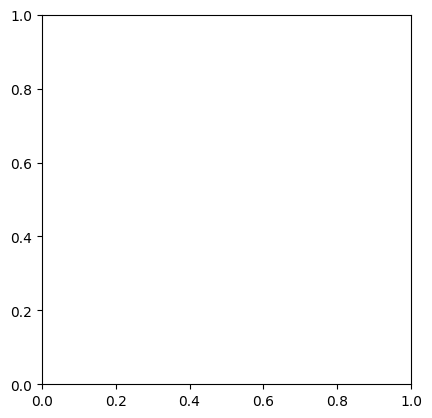

In [27]:
plt.imshow(img_t)

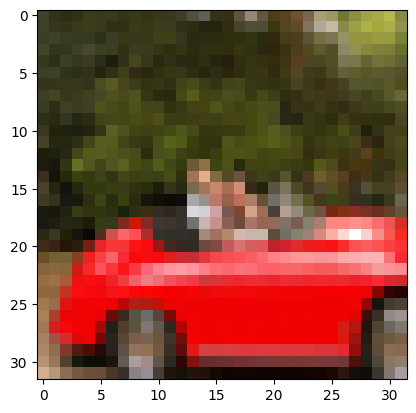

In [28]:
plt.imshow(img_t.permute(1,2,0))

When you use imshow from Matplotlib to display an image, it expects the color channel to be the last dimension of the input image.

#Normalize dataset

When you use imshow from Matplotlib to display an image, it expects the color channel to be the last dimension of the input image.

When you use imshow from Matplotlib to display an image, it expects the color channel to be the last dimension of the input image.

In [29]:
imgs = torch.stack([img_t for img_t, _ in tensor_cifar10], dim=3)
imgs

tensor([[[[0.2314, 0.6039, 1.0000,  ..., 0.1373, 0.7412, 0.8980],
          [0.1686, 0.4941, 0.9922,  ..., 0.1569, 0.7294, 0.9255],
          [0.1961, 0.4118, 0.9922,  ..., 0.1647, 0.7255, 0.9176],
          ...,
          [0.6196, 0.3569, 0.9922,  ..., 0.3882, 0.6863, 0.8510],
          [0.5961, 0.3412, 0.9922,  ..., 0.3098, 0.6745, 0.8667],
          [0.5804, 0.3098, 0.9922,  ..., 0.3490, 0.6627, 0.8706]],

         [[0.0627, 0.5490, 1.0000,  ..., 0.2235, 0.7608, 0.8706],
          [0.0000, 0.5686, 1.0000,  ..., 0.1725, 0.7490, 0.9373],
          [0.0706, 0.4902, 1.0000,  ..., 0.1961, 0.7451, 0.9137],
          ...,
          [0.4824, 0.3765, 1.0000,  ..., 0.6118, 0.6784, 0.8745],
          [0.4667, 0.3020, 1.0000,  ..., 0.5529, 0.6706, 0.8902],
          [0.4784, 0.2784, 1.0000,  ..., 0.4549, 0.6549, 0.8235]],

         [[0.0980, 0.5490, 1.0000,  ..., 0.3843, 0.8157, 0.8353],
          [0.0627, 0.5451, 0.9961,  ..., 0.2510, 0.8039, 0.9176],
          [0.1922, 0.4510, 0.9961,  ..., 0

In [30]:
imgs.shape

torch.Size([3, 32, 32, 50000])

In [31]:
imgs.view(3,-1).mean(dim=1) #calculate mean

tensor([0.4914, 0.4822, 0.4465])

In [32]:
imgs.view(3,-1).std(dim=1) #calculate standard deviation

tensor([0.2470, 0.2435, 0.2616])

In [41]:
transformed_cifar10 = datasets.CIFAR10(
    data_path, train=True, download=False,
    transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465),(0.2470, 0.2435, 0.2616))

]))

as now we normalized our image,

plotting an image drawn from dataset won't provide us with a faitjful represenation of the actual image :

In [45]:
transformed_cifar10

Dataset CIFAR10
    Number of datapoints: 50000
    Root location: /content/dataset_cifar10
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.4914, 0.4822, 0.4465), std=(0.247, 0.2435, 0.2616))
           )

In [46]:
transformed_cifar10[99]

(tensor([[[-1.0051, -1.1956, -1.2591,  ...,  0.6620,  0.9160,  0.1856],
          [-0.9892, -1.1163, -1.1639,  ...,  0.5984,  0.7255,  0.3127],
          [-1.0686, -0.9734, -1.1004,  ...,  0.4397,  0.3920, -0.0366],
          ...,
          [ 0.7413,  0.2809,  0.0745,  ..., -0.4971,  0.2492,  0.2174],
          [ 0.9160,  0.3920, -0.7193,  ..., -0.7035,  0.1539,  0.2809],
          [ 1.3288,  0.9001,  0.2174,  ..., -1.0527,  0.0745,  0.6937]],
 
         [[-0.9496, -1.1750, -1.2717,  ...,  0.7898,  0.9830,  0.2100],
          [-0.9335, -1.1267, -1.1750,  ...,  0.7415,  0.8220,  0.3710],
          [-0.9818, -0.9174, -1.0140,  ...,  0.5160,  0.4999,  0.0812],
          ...,
          [ 0.1939, -0.2087, -1.0784,  ..., -0.7724, -0.2409, -0.2893],
          [ 0.3710, -0.0799, -0.9496,  ..., -0.8207, -0.0799,  0.0328],
          [ 0.8220,  0.4516, -0.2248,  ..., -1.1106, -0.0638,  0.5321]],
 
         [[-1.0472, -1.3170, -1.4220,  ..., -0.6724, -0.5675, -0.6275],
          [-1.1521, -1.3170,

In [47]:
img_transformed,_ = transformed_cifar10[99]

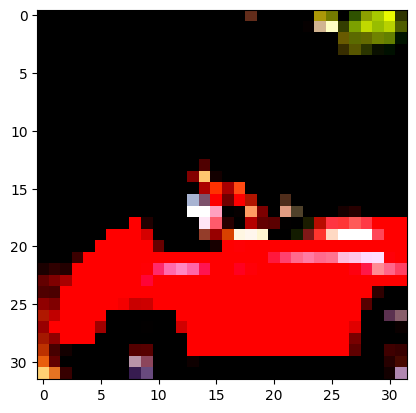

In [48]:
plt.imshow(img_transformed.permute(1,2,0))
